In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
sns.set_style("whitegrid")
pylab.rcParams['figure.figsize'] = 16, 12

# some common functions to be used during the course
%run helper_functions.py

Populating the interactive namespace from numpy and matplotlib


# Loading the news groupd data

In [2]:
from sklearn.datasets import fetch_20newsgroups
news_data = fetch_20newsgroups()

In [3]:
X = news_data.data
y = news_data.target

# Reducing the TF-iDF fector from thousands of dimentions to 2

Dimentions of tfidf_vector:  (11314, 8907)


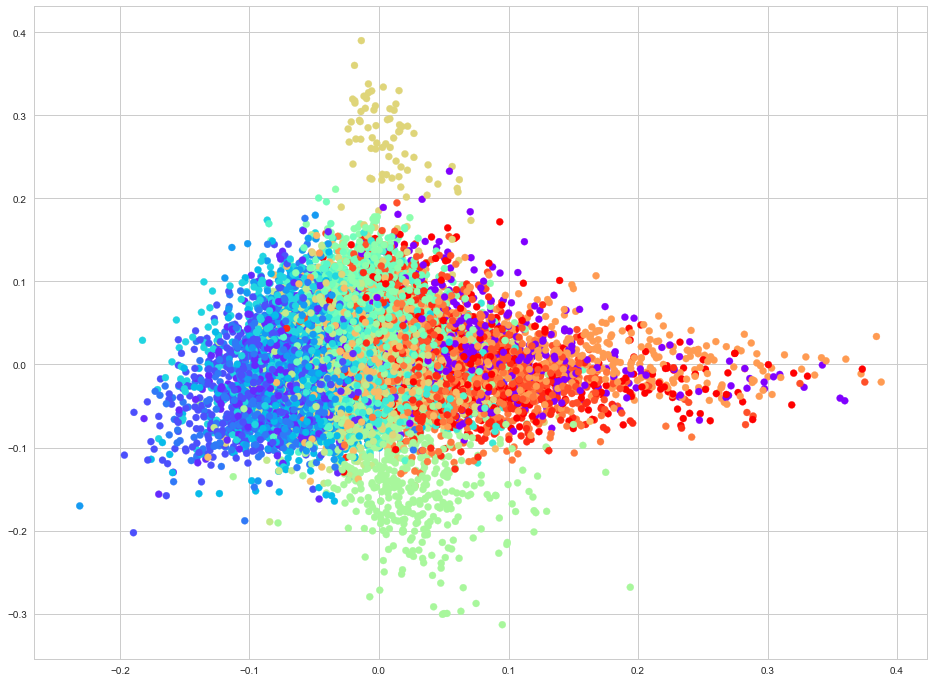

In [4]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vector = TfidfVectorizer(stop_words='english', min_df=20).fit_transform(X).todense()
print ("Dimentions of tfidf_vector: ", tfidf_vector.shape)

pca = PCA(n_components=2).fit(tfidf_vector)
data2D = pca.transform(tfidf_vector)

plt.scatter(data2D[:,0], data2D[:,1], c=news_data.target, cmap=pylab.cm.rainbow)
plt.show()  

## Lets see how much information we lost

/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       480
           comp.graphics       0.09      0.01      0.01       584
 comp.os.ms-windows.misc       0.21      0.64      0.32       591
comp.sys.ibm.pc.hardware       0.14      0.03      0.04       590
   comp.sys.mac.hardware       0.00      0.00      0.00       578
          comp.windows.x       0.15      0.17      0.16       593
            misc.forsale       0.21      0.39      0.27       585
               rec.autos       0.12      0.03      0.05       594
         rec.motorcycles       0.15      0.10      0.12       598
      rec.sport.baseball       0.07      0.01      0.02       597
        rec.sport.hockey       0.19      0.71      0.30       600
               sci.crypt       0.25      0.80      0.38       595
         sci.electronics       0.13      0.04      0.06       591
                 sci.med       0.11      0.06      0.08       594
         

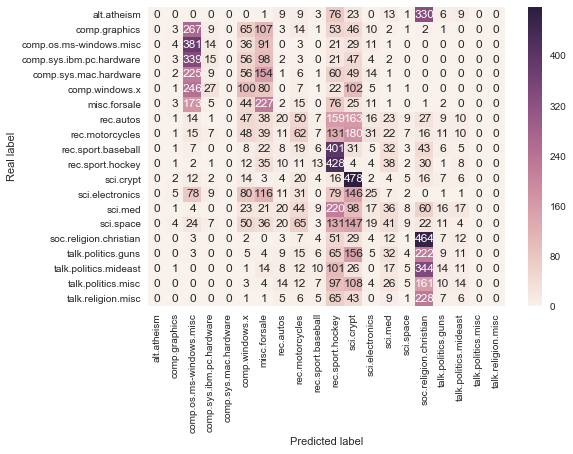

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

model = LogisticRegression()
y_pred = cross_val_predict(model, data2D, y, cv=3) #try tfidf_vector and data2D

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print (classification_report(y, y_pred, target_names = news_data.target_names))
print ("Accuracy: ", accuracy_score(y, y_pred))
cm =  confusion_matrix(y_pred=y_pred, y_true=y)
plot_confusion_matrix(cm, news_data.target_names)

In [10]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVecotirizer

pca ) PCA(n_components=1000).fit(tdidf_vector)
variance = pca.explained_variance_ratio_
print(variance)
plt.plot(variance)

SyntaxError: invalid syntax (<ipython-input-10-b9db250dd66b>, line 4)